<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ufidon/ml/blob/main/mod2/reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ufidon/ml/blob/main/mod2/reg.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>
<br>


__[Regression](https://en.wikipedia.org/wiki/Regression_analysis)__

_homl3 ch4_

- Linear Regression
  - The Normal Equation
  - Computational Complexity
  - Gradient Descent
    - Batch Gradient Descent
    - Stochastic Gradient Descent
    - Mini-Batch Gradient Descent
- Polynomial Regression
  - Learning Curves
  - Regularized Linear Models
    - Ridge Regression
    - Lasso Regression
    - Elastic Net Regression
    - Early Stopping
- Logistic Regression
  - Estimating Probabilities
  - Training and Cost Function
  - Decision Boundaries
  - Softmax Regression

What is regression?
---
Given $N$ samples $\lbrace (\vec{x_1},y_1),(\vec{x_2},y_2), ⋯, (\vec{x_N},y_N) \rbrace$, 
- $\vec{x_i}$: feature vector of sample $i$
  - $\vec{x_i}∈X$, sample or features space
- $y_i$: sample $i$'s target value, a real number
  - $y_i∈Y$, a subset of real number $R$

Training a machine learning model $m_{\vec{α}}: \hat{y}=m_{\vec{α}}(\vec{x},y)$ is the process of optimizing its parameter vector $\vec{α}=(α_1,α_2,⋯,α_M)$ in its parameter space $\mathcal{Α}$ to find the $\vec{α^*}$ which maximizes a scoring function $s:X×Y→R$,

$$\displaystyle s^*=argmax_{\vec{α^*} \in \mathcal{Α}} s(\hat{y},y)=argmax_{\vec{α^*} \in \mathcal{Α}} s(m(\vec{x},y),y)$$

- or minimize a cost function $c:X×Y→R$,

$$\displaystyle c^*=argmin_{\vec{α^*} \in \mathcal{Α}} c(\hat{y},y)=argmin_{\vec{α^*} \in \mathcal{Α}} c(m(\vec{x},y),y)$$

[Linear regression](https://en.wikipedia.org/wiki/Linear_regression)
---
- estimates the linear relationship between 
  - a scalar response $y$ and 
  - $m$ iput features $x_1,x_2,⋯,x_m$ through $n$ samples
  - $((x_{i1}, x_{i2}, ⋯, x_{im}), y_i),\qquad i=1,\ldots ,n$
- by simply computing the estimation $\hat{y_{i}}$ of the true response $y_i$
  
  $${\displaystyle \hat{y_{i}}=\theta _{0}⋅1+\theta _{1}x_{i1}+\cdots +\theta _{m}x_{im}+\varepsilon_{i}}$$

  - a *weighted sum* of the input features 
  - plus a constant called the *bias term* $\theta _{0}$
    - also called the *intercept* term
  - and a disturbance term or error variable $\varepsilon$
    - an unobserved random variable, omitted below for simplification
- the calculation can be concisely noted in vector form

$$\hat{y_i}=h_{\vec{θ}}(\vec{x_i})=\vec{x_i}⋅\vec{θ}^T$$

  - ${h_{\vec{θ}}}$ is the hypothesis function with model parameters $\vec{θ}$
  - $\vec{θ}=(θ_0, θ_1, ⋯, θ_m)$ is the model’s parameter vector
  - $\vec{x_i}=(x_{i0}, x_{i1}, x_{i2}, ⋯, x_{im})$ is sample $i$'s feature vector, in which $x_{i0}$ is always 1
  - $\vec{x_i}⋅\vec{θ}$ is the *dot product* of vector $\vec{θ}\text{ and }\vec{x_i}$

Together, can be noted in a single matrix equation

$$\vec{\hat{y}}=X\vec{θ}$$

- $\vec{\hat{y}}=(\hat{y_1}, \hat{y_2}, ⋯, \hat{y_n})$
- ${\displaystyle \mathbf {X} ={\begin{bmatrix}\mathbf {x} _{1}^{\mathsf {T}}\\\mathbf {x} _{2}^{\mathsf {T}}\\\vdots \\\mathbf {x} _{n}^{\mathsf {T}}\end{bmatrix}}={\begin{bmatrix}1&x_{11}&\cdots &x_{1m}\\1&x_{21}&\cdots &x_{2m}\\\vdots &\vdots &\ddots &\vdots \\1&x_{n1}&\cdots &x_{nm}\end{bmatrix}},}$

[mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error)
---
A regression model can be evaluated with 
- *root mean square error (RMSE)* or simply 
- *mean square error (MSE)*

$$\displaystyle \operatorname{MSE}(X,h_{\vec{θ}})=||\vec{\hat{y}}-\vec{y}||^2=\frac{1}{n} \sum_{i=1}^n(\hat{y_i}-y_i)^2$$

The optimized $\vec{θ^*}$ that minimized the MSE has an analytical solution in the form of *the normal equation*

$${\displaystyle {\boldsymbol {\theta^* }}=(\mathbf {X} ^{\mathsf {T}}\mathbf {X} )^{-1}\mathbf {X} ^{\mathsf {T}}\mathbf {y}}$$

⚠️ *a symbol with a head arrow or bold font both means a vector*

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sklearn as skl, sklearn.datasets as skds

🍎 A simle example

Given

- the linear regression model: $y=θ_0+θ_1x_1$
- and the the dataset generated with $y = 4 + 3x_1$ + Gaussian noise

Find the optimized parameters


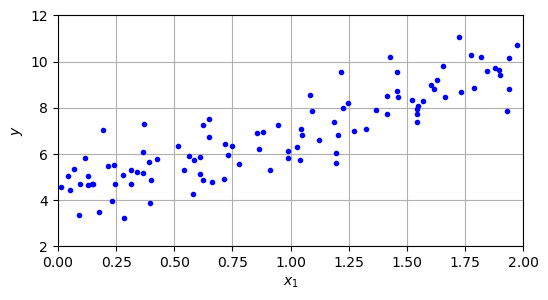

In [3]:

# 1. generate a toy data set with only one feature x1
np.random.seed(42) 
n = 100 
X = 2 * np.random.rand(n, 1) 
y = 4 + 3 * X + np.random.randn(n, 1) 

# 2. visualize the toy sata set
import matplotlib.pyplot as plt

fig1, axe1 = plt.subplots(figsize=(6, 3))
axe1.plot(X, y, "b.")
axe1.set(xlabel= "$x_1$", ylabel="$y$")
axe1.axis([0, 2, 2, 12])
axe1.grid()

In [4]:
# 3. Find the optimal parameters by the normal equation

X_b = np.c_[np.ones((n,1)),X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [5]:
# 4. make a prediction
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones(X_new.shape), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

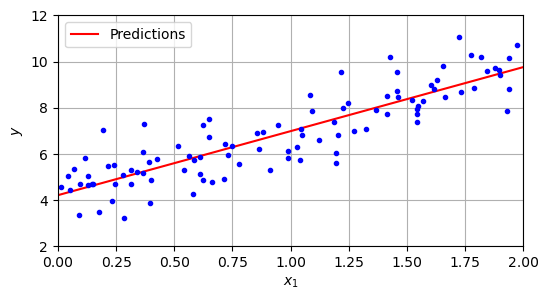

In [6]:
# 4. visualize the linear model
fig2, axe2 = plt.subplots(figsize=(6, 3))  # extra code – not needed, just formatting
axe2.plot(X_new, y_predict, "r-", label="Predictions")
axe2.plot(X, y, "b.")
axe2.set(xlabel="$x_1$", ylabel="$y$")
axe2.axis([0, 2, 2, 12])
axe2.grid()
axe2.legend(loc="upper left");

In [7]:
# 5. Find the optimized parameters using 
# the linear regression model in Scikit-Learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [8]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [9]:
# The LinearRegression class is based on 
# the np.linalg.lstsq() function 
# (the name stands for "least squares")
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

- *np.linalg.lstsq()* computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ 
  - specifically the Moore-Penrose inverse 
    - can be computed with `np.linalg.pinv()` directly
- the Normal equation may not work if the matrix $\mathbf{X^T}\mathbf{X}$ is not invertible
  - but the pseudoinverse is always defined


In [10]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

Computational Complexity
---
Given a dataset with $n$ samples and $m$ features,

- to find the optimized parameters,
  - the Normal equation computes the inverse of $\mathbf{X^T}\mathbf{X}$
    - with complexity about $O(m^{2.4})$ to $O(m^2)$
  - the SVD approach used by Scikit-Learn’s LinearRegression class is about $O(m^2)$.
- to make predictions
  - the complexity is $O(n×m)$

[Gradient Descent (GD)](https://en.wikipedia.org/wiki/Gradient_descent)
---
- a method for unconstrained mathematical optimization
- it tweaks parameters iteratively in order to minimize the cost function $F(\vec {θ})$
  - along the direction of steepest descent, i.e.
  - the opposite direction of the current gradient of $F(\vec {θ})$
  - the subscript below means step

$${\displaystyle \vec {θ} _{n+1}=\vec {θ} _{n}-\eta_n \nabla F(\vec {θ} _{n})}$$

- which generates a monotonic sequence 
    
$${\displaystyle F(\vec {θ} _{0})\geq F(\vec {θ} _{1})\geq F(\vec {θ} _{2})\geq \cdots}$$

- each iteration is called an *epoch*
- $\eta_n$ is the *learning rate* at step $n$
  - too small, slow to converge
  - too big, diverge possibly
  - usually set to be proportional to the change of the norm of the gradient
    - similar to *simulated annealing*
    - stop with a tolerance of the norm change
  - the function determining the learning rate at each iteration is called the
*learning schedule*
- once the gradient gets 0, a minimum is reached
- $\vec {θ}_{0}$ is randomly chosen, 
  - no guarantee of reaching global minimum if the function terrain is complex
  - for a convex function, there is only one global minimum
    - MSE cost function is a convex function
  - the shape of a convex function looks like a bowl
    - the bowl is elongated for features with different scales
    - it is better rescale all features to a similar scale
      - e.g. using StandardScaler in sklearn

Batch Gradient Descent (BGD)
---
- denote MSE as $F$, then its gradient vector is

$${\displaystyle \nabla F(\vec{θ})={\begin{bmatrix}{\frac {\partial F}{\partial θ_{0}}}(\vec{θ})\\{\frac {\partial F}{\partial θ_{1}}}(\vec{θ})\\\vdots \\{\frac {\partial F}{\partial θ_{m}}}(\vec{θ})\end{bmatrix}}}=\frac{2}{n}{\mathbf{X^T(X\boldsymbol{θ}-y)}}$$
  - $\mathbf{X}$ is the full training set, so the algorithm is called *batch gradient descent*
  - for a linear regression model with many features, 
    - BGD is much faster than Normal equation and SVD

In [11]:
# 1. a quick implementation of of BGD
eta = 0.1  
n_epochs = 1000 # ⚠️ note down this number, compare with SGD later
n = len(X_b)  

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / n * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

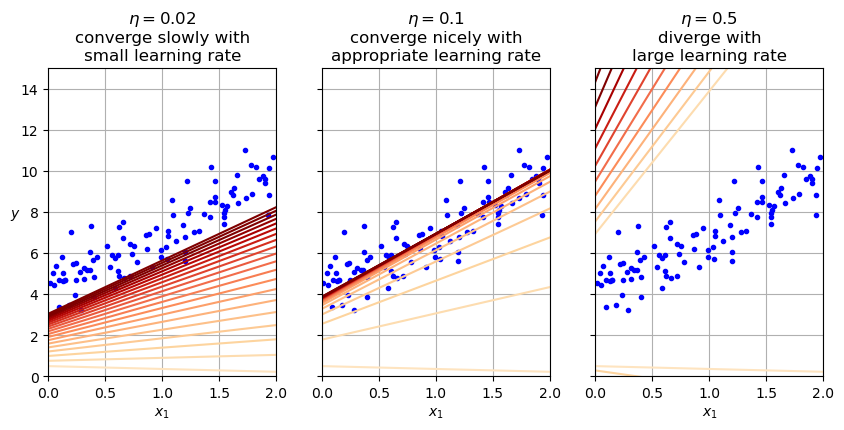

In [22]:
# 2. learning rate and convergence
# The line at the bottom of each plot represents the random starting point,
# then each epoch is represented by a darker and darker line

def plot_gradient_descent(ax, theta, eta, msg=''):
    n = len(X_b)
    ax.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            ax.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / n * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    ax.axis([0, 2, 0, 15])
    ax.grid()
    ax.set(xlabel="$x_1$", title=f"$\eta = {eta}$\n{msg}")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

fig3, axe3 = plt.subplots(1,3, figsize=(10, 4))

plot_gradient_descent(axe3[0], theta, eta=0.02, msg='converge slowly with\nsmall learning rate')
axe3[0].set_ylabel("$y$", rotation=0)

theta_path_bgd = plot_gradient_descent(axe3[1], theta, eta=0.1, msg='converge nicely with\nappropriate learning rate')
axe3[1].set_yticklabels([])

axe3[2].set_yticklabels([])
plot_gradient_descent(axe3[2], theta, eta=0.5, msg='diverge with\nlarge learning rate');

Stochastic Gradient Descent (SGD)
---
- BGD gets slower with larger training dataset since
  - it uses the whole training set to compute the gradient at every step
- SGD computes the gradient with only *a randomly chosen sample* at each step
  - moves irregularly due to its stochastic nature
  - the cost function may bounce up and down
    - decreasing only on average
    - bounce around even close to the minimum
    - possibly bounce off from a local minimum to find the global minimum
  - the training set should be shuffled first

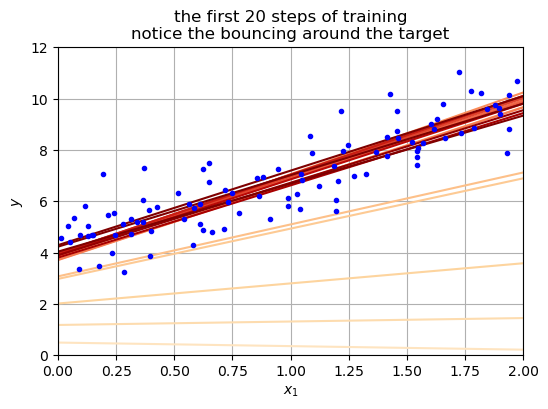

In [31]:
# 1. SGD with a simple schedule
theta_path_sgd = []

n_epochs = 50

# a simple learning schedule hyperparameters
def learning_schedule(iter, p0=5, p1=50):
    return p0 / (iter + p1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

# 2. visualize the path of theta in the parameter space
n_shown = 20 
fig4, axe4 = plt.subplots(figsize=(6, 4)) 

for epoch in range(n_epochs):
    for iteration in range(n):
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            axe4.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(n)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by n
        eta = learning_schedule(epoch * n + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta) 

axe4.plot(X, y, "b.")
axe4.set(xlabel = "$x_1$", ylabel ="$y$", 
         title='the first 20 steps of training\nnotice the bouncing around the target')
axe4.axis([0, 2, 0, 12])
axe4.grid()


In [25]:
# 3. get a good result with only 50 epoches while BGD needs 1000 epoches
theta

array([[4.21076011],
       [2.74856079]])

In [28]:
# 4. SGDRegressor - SGD from Scikit-Learn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [29]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

Mini-Batch Gradient Descent (MBGD)
---
- a trade-off between BGD and SGD
- MBGD computes the gradients on small random sets of instances called mini-batches
  - parameter path is less erratic than SGD
  - can get a performance boost over SGD from hardware optimization of matrix operations
  - but may be harder to escape from local minima

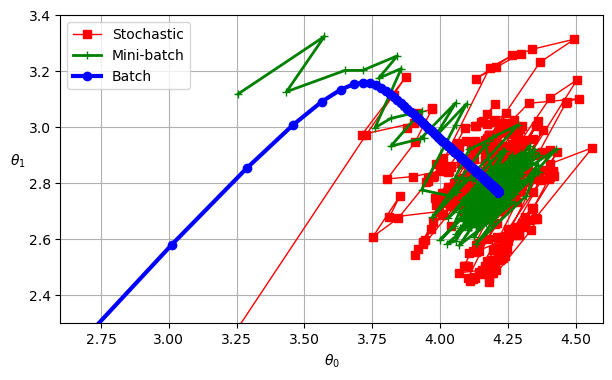

In [33]:
# 1. A comparison of approaching-target behavior for BGD, SGD and MBGD
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(n / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

p0, p1 = 200, 1000  # learning schedule hyperparameters

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(n)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration, p0, p1)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

fig5, axes = plt.subplots(figsize=(7, 4))
axes.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
axes.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
axes.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
axes.legend(loc="upper left")
axes.set_xlabel(r"$\theta_0$")
axes.set_ylabel(r"$\theta_1$   ", rotation=0)
axes.axis([2.6, 4.6, 2.3, 3.4])
axes.grid()

- all end up near the minimum
- BGD’s path actually stops at the minimum
  - take more time than MBGD and SGD
- both SGD and MBGD continue to walk around
  - can be fixed with a good learning schedule

Comparison of algorithms for linear regression
---
Given n samples, each with m features

| Algorithm | Large n | out-of-core<br>support | Large m |  Hyper-parameters |  Scalable |
|:---:|:---:|:---:|:---:|:---:|:---:|
| Normal equation | Fast |  No |  Slow | 0 | No |
| SVD | Fast | No | Slow |  0 |  No | 
| Batch GD | Slow |  No | Fast | 2 | Yes |
| Stochastic GD |  Fast | Yes | Fast | ≥2 |  Yes |
| Mini-batch GD |  Fast | Yes | Fast |  ≥2 | Yes|